# Unit 5 - Financial Planning

In [63]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [64]:
# Load .env enviroment variables
load_dotenv('api.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [65]:
# Set current amount of crypto assets
btc_hodl = 1.2
eth_hodl = 5.3

In [66]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [67]:
# Fetch current BTC price
my_btc = requests.get(btc_url).json()
my_btc_price = my_btc['data']['1']['quotes']['USD']['price']
# print(my_btc_price)

# Fetch current ETH price
my_eth = requests.get(eth_url).json()
my_eth_price = my_eth['data']['1027']['quotes']['USD']['price']
# print(my_eth_price)

# Compute current value of my crpto
my_btc_value = my_btc_price * btc_hodl
my_eth_value = my_eth_price * eth_hodl
my_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {btc_hodl} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_hodl} ETH is ${my_eth_value:0.2f}")
print(my_crypto_value)

The current value of your 1.2 BTC is $36031.20
The current value of your 5.3 ETH is $10117.49
46148.687999999995


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [115]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [116]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



In [117]:
# Format current date as ISO format
start = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_closing = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
# df_closing.head(10)

# Display first 10 rows of AGG and SPY side by side
df_agg = df_closing[df_closing['symbol'] == "AGG"].head()
df_spy = df_closing[df_closing['symbol'] == "SPY"].head()

# Concatenate the DataFrames side by side
df_combined = pd.concat([df_agg, df_spy], axis=1)

# Display the combined DataFrame
df_combined.head()


,open,high,low,close,volume,trade_count,vwap,symbol,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG,333.28,334.88,332.3,334.57,57282821,350100,333.800372,SPY


In [118]:
# Pick AGG and SPY close prices

agg_close_price = df_closing[df_closing['symbol'] == "AGG"]['close'].head(10)
spy_close_price = df_closing[df_closing['symbol'] == "SPY"]['close'].head(10)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2020-08-07 04:00:00+00:00    119.43
Name: close, dtype: float64
Current SPY closing price: $timestamp
2020-08-07 04:00:00+00:00    334.57
Name: close, dtype: float64


In [119]:
# Compute the current value of shares
agg_shares_value = agg_close_price * my_agg
spy_shares_value = spy_close_price * my_spy

# print(spy_shares_value)
# print(agg_shares_value)

# Access the first value from each Series
agg_shares_value = agg_shares_value.iloc[0]
spy_shares_value = spy_shares_value.iloc[0]

total_shares_value = agg_shares_value + spy_shares_value
print(f"total: {total_shares_value}")
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_shares_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_shares_value:0.2f}")

total: 60688.7
The current value of your 110 SPY shares is $36802.70
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [120]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_crypto_value, total_shares_value] 

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, index=['my_crypto_value', 'total_shares_value'], columns=['Value'])


# Display savings DataFrame
display(savings_df)

,Value
my_crypto_value,46148.688
total_shares_value,60688.700


<Axes: ylabel='Value'>

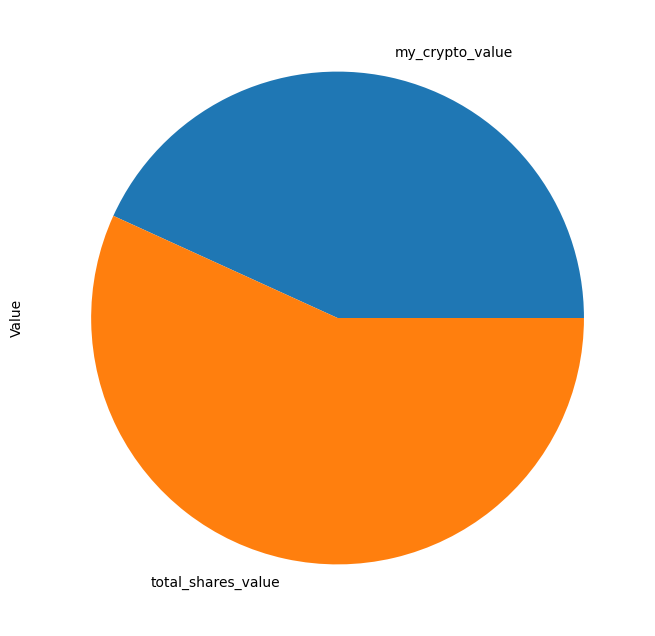

In [121]:
# Plot savings pie chart
savings_df.plot(kind='pie', y='Value', legend=False, figsize=(8, 8))

In [122]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
total_savings = my_crypto_value + total_shares_value
print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats! You have enough ${total_savings} in your fund!")
elif total_savings == emergency_fund:
    print(f"Congrats! You have reached your goal!")
else:
    print(f"You are ${total_savings - emergency_fund} from your goal!")

36000
106837.38799999999
Congrats! You have enough $106837.38799999999 in your fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [123]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [124]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_closing_five = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# print(df_closing_five)

# Reorganize the DataFrame

# Separate ticker data
df_agg_five = df_closing_five[df_closing_five['symbol'] == "AGG"].drop('symbol', axis=1)
df_spy_five = df_closing_five[df_closing_five['symbol'] == "SPY"].drop('symbol', axis=1)


# Concatenate the DataFrames side by side
df_combined_five = pd.concat([df_spy_five, df_agg_five], axis=1, keys=['SPY', 'AGG'])

# Display the combined DataFrame
print(df_combined_five)

                              SPY                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2018-05-01 04:00:00+00:00  263.87  265.1000  262.110  264.96   76110600   
2018-05-02 04:00:00+00:00  264.76  265.6800  262.760  263.17   86373743   
2018-05-03 04:00:00+00:00  262.26  263.3600  259.050  262.59  136921861   
2018-05-04 04:00:00+00:00  261.52  266.7892  261.150  265.92   91230645   
2018-05-07 04:00:00+00:00  266.89  268.0200  266.110  266.92   56495099   
...                           ...       ...      ...     ...        ...   
2023-04-25 04:00:00+00:00  410.58  411.1600  406.020  406.08   97784465   
2023-04-26 04:00:00+00:00  406.72  407.8400  403.780  404.36   80954650   
2023-04-27 04:00:00+00:00  407.00  412.6900  406.740  412.41   92968169   
2023-04-28 04:00:00+00:00  411.49  415.9300  411.430  415.93   84857179   
2023-05-01 04:00:00+00:00

In [125]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

mc_simulation = MCSimulation(
    portfolio_data = df_combined_five,
    weights = [0.60, 0.40],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)


In [126]:
# Printing the simulation input data
print(mc_simulation)

In [127]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
import warnings

warnings.filterwarnings('ignore')

mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010930,0.996595,0.998278,0.998552,0.998081,1.004534,0.998683,1.003489,0.996700,1.001103,...,0.999995,0.998550,0.998340,1.000590,0.991461,0.997458,1.015221,0.980894,0.987894,0.994597
2,1.022336,1.000709,1.003996,1.002556,0.987301,1.002619,0.999869,0.999279,0.989714,1.000162,...,0.994170,0.998033,1.010146,1.001594,0.982723,0.991443,1.027138,0.981331,0.991154,1.008063
3,1.023698,0.991674,0.998489,1.014572,0.992263,1.013383,0.996115,1.002637,0.987151,0.995190,...,0.988466,1.006658,1.010875,0.994209,0.993168,1.000863,1.006545,0.982241,1.000070,0.998035
4,1.026787,0.995539,1.009994,1.009577,0.994334,1.021145,1.000664,0.993247,0.992797,1.000553,...,0.998652,1.015998,1.012495,0.996896,0.995217,0.987063,1.003417,0.989819,1.000541,0.997468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.266794,3.703491,4.812921,9.313833,10.044991,13.114680,13.987915,3.109536,7.560913,12.704586,...,9.710443,4.768008,15.619578,14.702824,1.673623,13.838552,9.039592,1.282052,4.030590,3.044248
7557,3.272457,3.665637,4.794454,9.379622,10.079951,13.052831,13.918504,3.064394,7.534486,12.614634,...,9.629819,4.684488,15.703172,14.751727,1.674219,14.124006,9.027417,1.265694,4.051034,3.029731
7558,3.327390,3.680246,4.782386,9.337908,10.063131,13.097680,14.040937,3.072172,7.558368,12.669957,...,9.658297,4.739774,15.616144,14.866824,1.664966,14.102408,9.107041,1.264029,4.082548,3.066812
7559,3.331114,3.724384,4.774183,9.343558,10.189873,13.081981,14.217309,3.114801,7.636421,12.439457,...,9.765335,4.788755,15.816454,14.810345,1.652022,14.046371,9.063920,1.260248,4.049411,3.086445


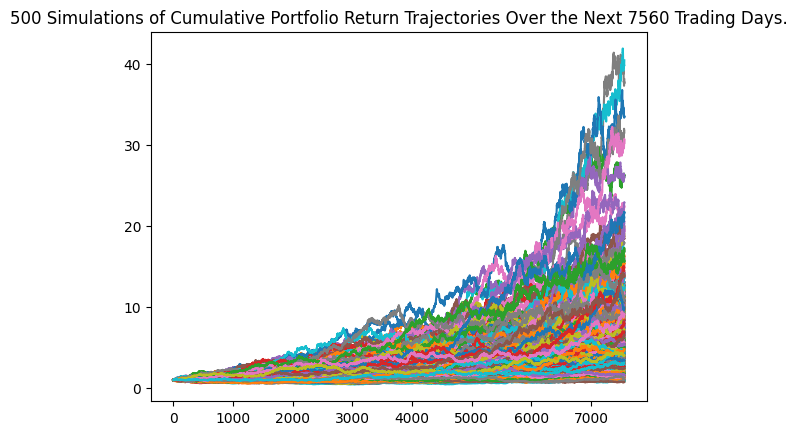

In [128]:
# Plot simulation outcomes
line_plot = mc_simulation.plot_simulation()


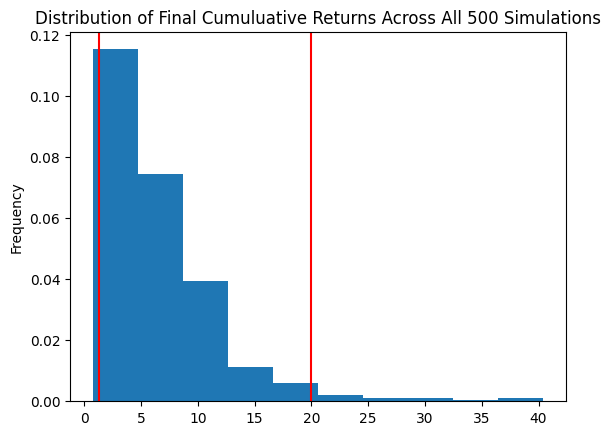

In [129]:
# Plot probability distribution and confidence intervals
dist_plot = mc_simulation.plot_distribution()

### Retirement Analysis

In [130]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_data = {
    "mean": list(mc_simulation.simulated_return.mean(axis=1)),
    "median": list(mc_simulation.simulated_return.median(axis=1)),
    "min": list(mc_simulation.simulated_return.min(axis=1)),
    "max": list(mc_simulation.simulated_return.max(axis=1))
}



sum_stat = mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(sum_stat)
# print(simulated_returns_data)

count           500.000000
mean              6.573528
std               5.239957
min               0.735843
25%               3.121362
50%               5.140386
75%               8.552723
max              40.433392
95% CI Lower      1.262300
95% CI Upper     19.971112
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [131]:
# Set initial investment
initial_investment = 20000



# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stat[8]*initial_investment,2)
ci_upper = round(sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25246.0 and $399422.24


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [132]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $36943.07 and $573135.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [133]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

mc_simulation_five_year = MCSimulation(
    portfolio_data = df_combined_five,
    weights = [0.80, 0.20],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [134]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
print(mc_simulation_five_year)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

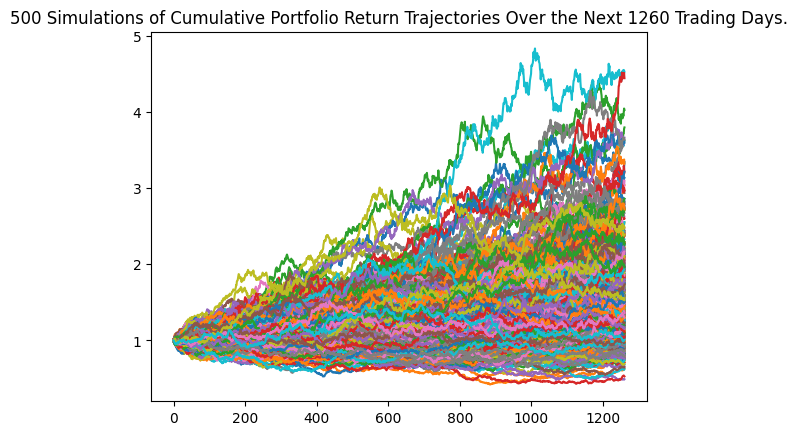

In [135]:
# Plot simulation outcomes
line_plot_five_year = mc_simulation_five_year.plot_simulation()

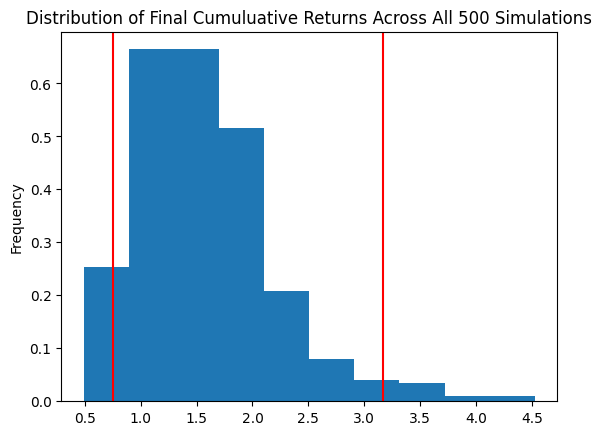

In [136]:
# Plot probability distribution and confidence intervals
five_year_dist = mc_simulation_five_year.plot_distribution()

In [137]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat_five = mc_simulation_five_year.summarize_cumulative_return()

print(sum_stat_five)

count           500.000000
mean              1.571204
std               0.618012
min               0.491439
25%               1.111260
50%               1.485841
75%               1.858808
max               4.525566
95% CI Lower      0.750293
95% CI Upper      3.171287
Name: 1260, dtype: float64


In [138]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stat_five[8]*initial_investment_five,2)
ci_upper_five = round(sum_stat_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15005.85 and $63425.74


### Ten Years Retirement Option

In [139]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_ten = MCSimulation(
    portfolio_data = df_combined_five,
    weights = [0.80, 0.20],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [140]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
print(mc_sim_ten)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

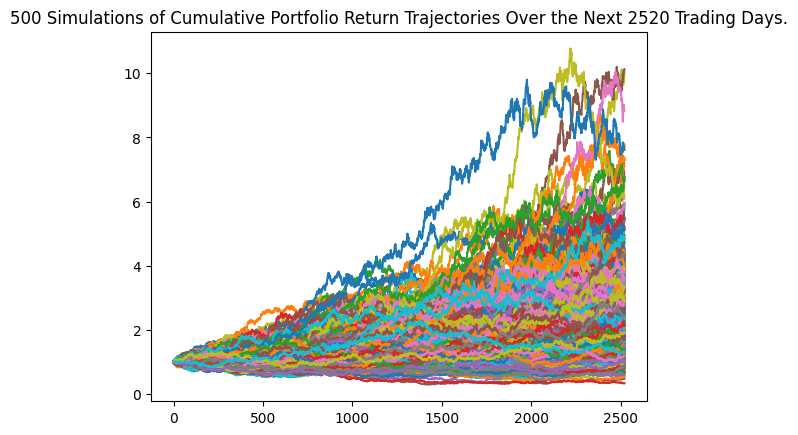

In [141]:
# Plot simulation outcomes
sim_ten_plot = mc_sim_ten.plot_simulation()

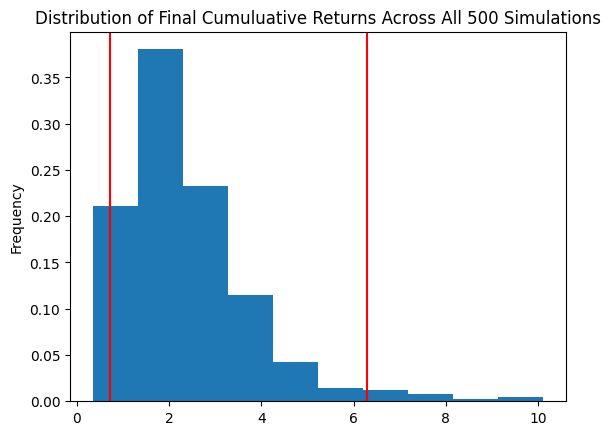

In [142]:
sim_ten_dist = mc_sim_ten.plot_distribution()

In [143]:
sum_stat_ten = mc_sim_ten.summarize_cumulative_return()

print(sum_stat_ten)

count           500.000000
mean              2.384350
std               1.396498
min               0.338759
25%               1.445731
50%               2.034130
75%               2.924466
max              10.118263
95% CI Lower      0.706465
95% CI Upper      6.282758
Name: 2520, dtype: float64


In [144]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stat_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(sum_stat_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $14129.3 and $125655.15


In [148]:
print(f"Using .80% stocks and .20% bonds increases the upper range however also expands the lower compared to .60 stocks and .40 bonds. The ability to retire is based on what the monthly budget is for each person in combination with the amount of years they have no additional income. *shrug* ") 

Using .80% stocks and .20% bonds increases the upper range however also expands the lower compared to .60 stocks and .40 bonds. The ability to retire is based on what the monthly budget is for each person in combination with the amount of years they have no additional income. *shrug* 
